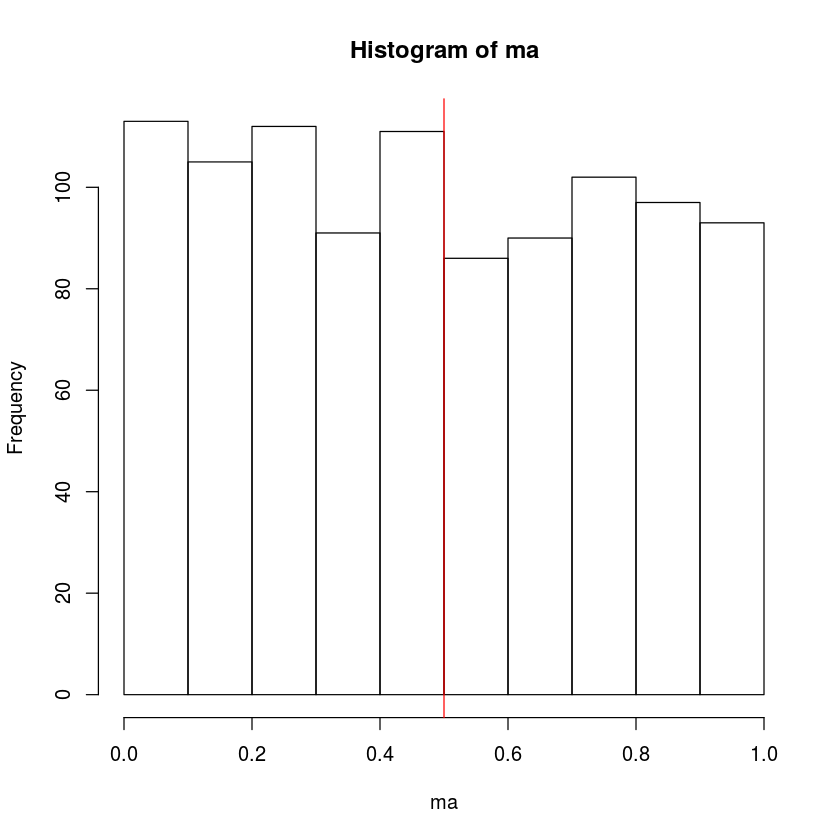

In [23]:
# Ej 1.a
Nrep = 1000
ma = runif(Nrep, 0, 1)
hist(ma)
abline(v=0.5, col='red')

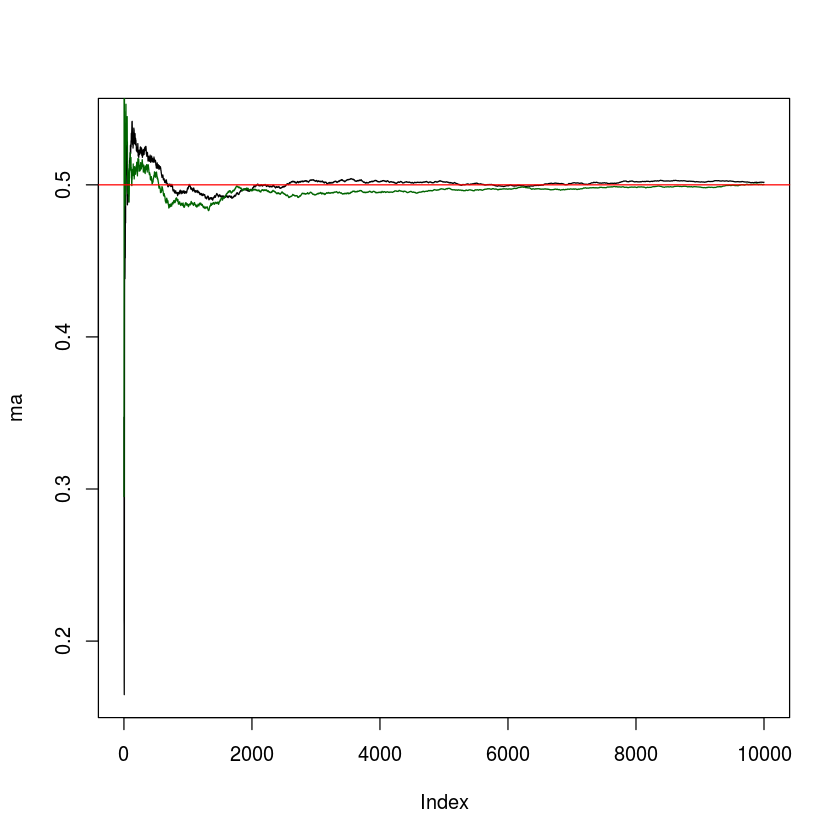

In [29]:
# Ej 1.b
ma = runif(10000, 0, 1)
ma = cumsum(ma) / seq(1, length(ma))
plot(ma, type='l')
ma = runif(10000, 0, 1)
ma = cumsum(ma) / seq(1, length(ma))
lines(ma, col='darkgreen')
abline(h=0.5, col='red')

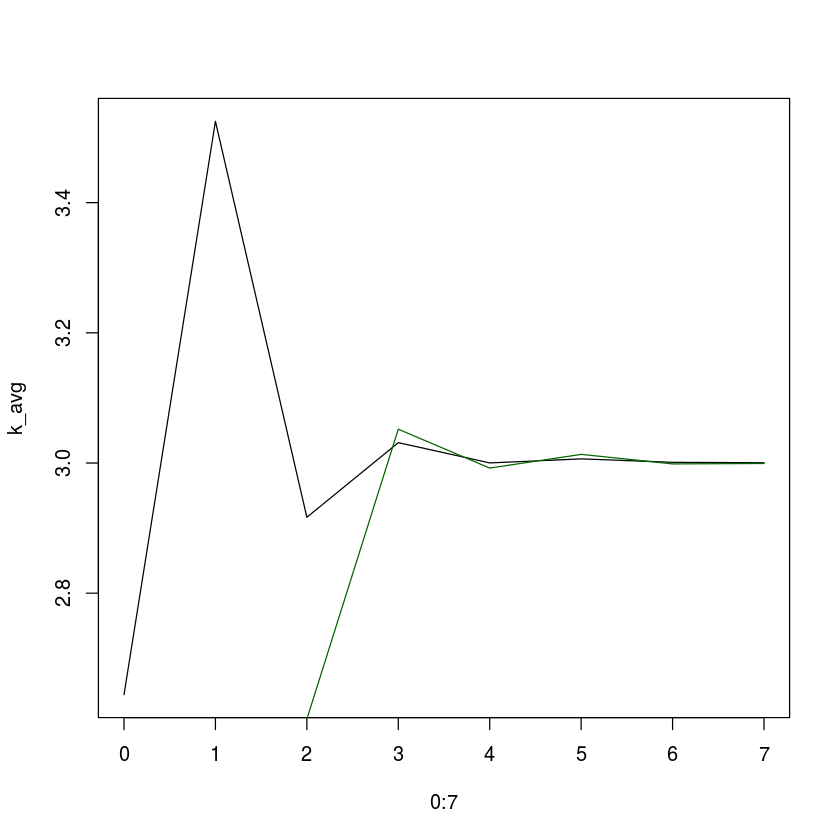

In [51]:
# Ej 1.d
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rnorm(xn, 3, 2)))})
plot(0:7, k_avg, type='l')
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rnorm(xn, 3, 2)))})
lines(0:7, k_avg, type='l', col='darkgreen')

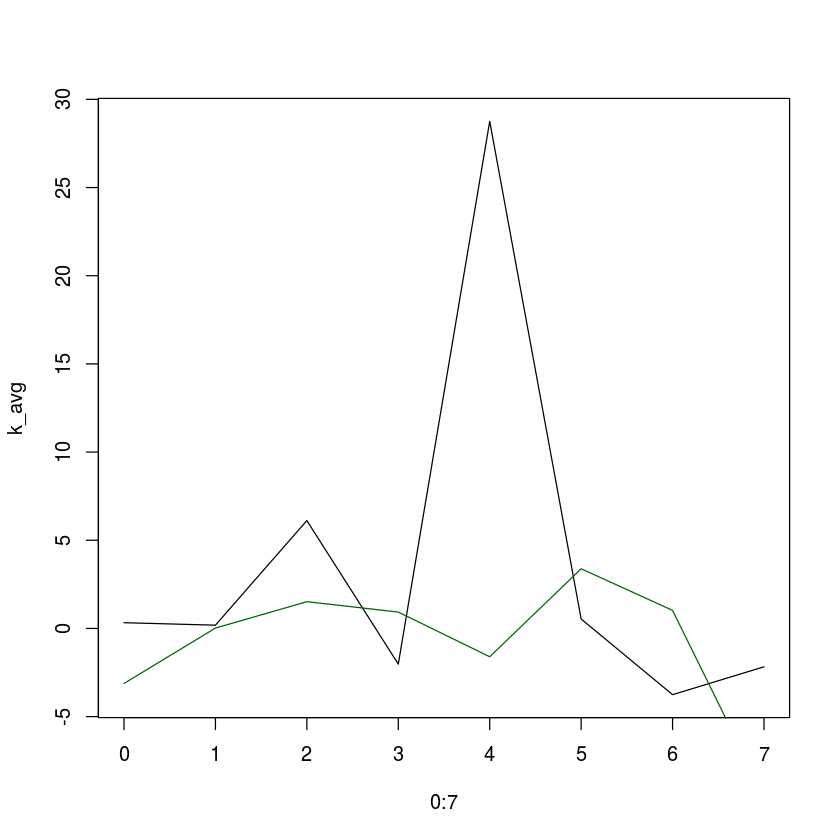

In [52]:
# Ej 1.f
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rcauchy(xn, 0, 1)))})
plot(0:7, k_avg, type='l')
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rcauchy(xn, 0, 1)))})
lines(0:7, k_avg, col='darkgreen')

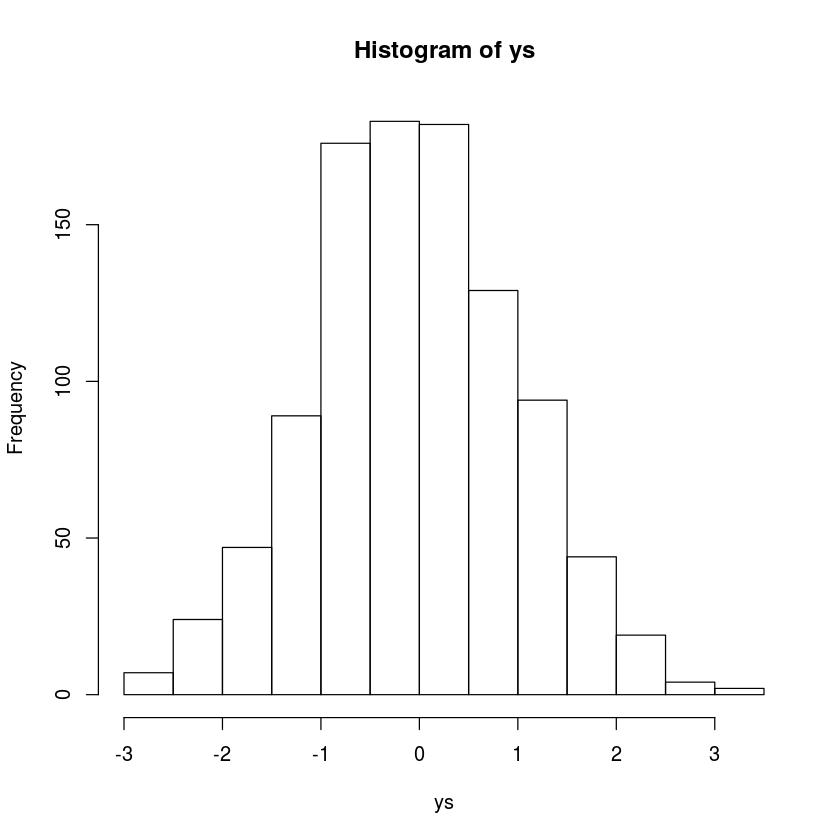

In [53]:
# Ej 2.a
Nrep = 1000
ys = rnorm(Nrep, 0, 1)
hist(ys)

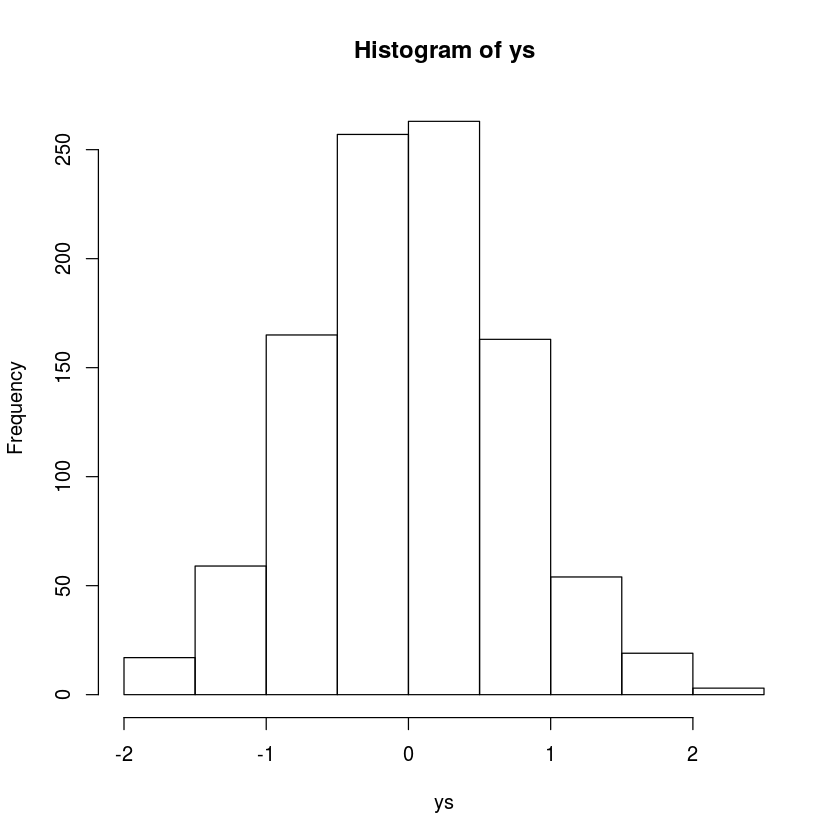

In [57]:
# Ej 2.b
ys = sapply(1:1000, function(x) { return(mean(rnorm(2, 0, 1))) } )
hist(ys)

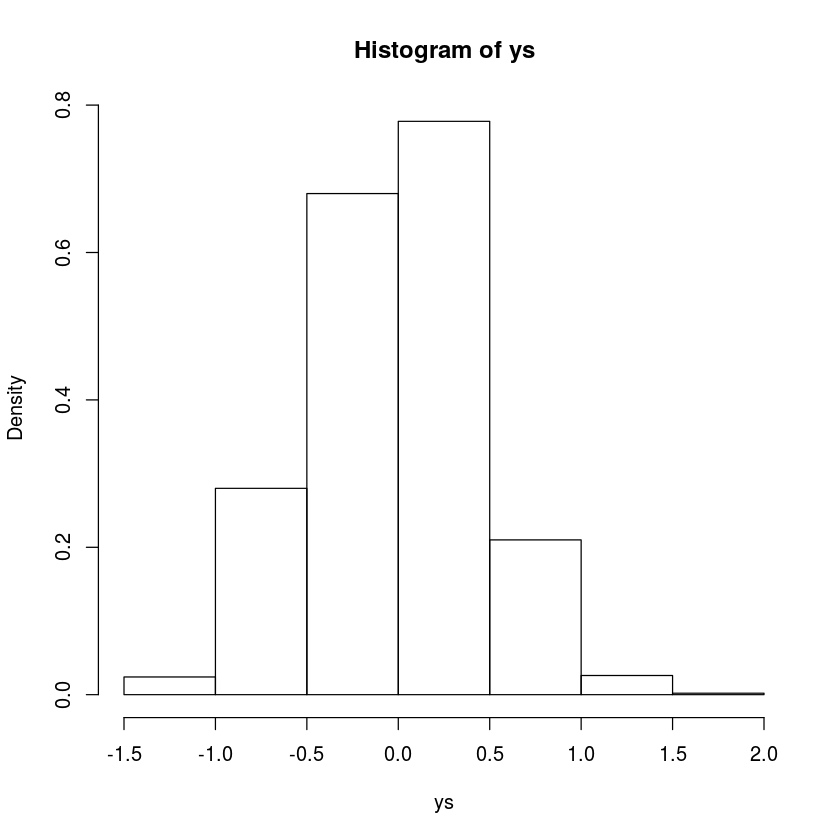

In [65]:
# Ej 2.c
ys = sapply(1:1000, function(x) { return(mean(rnorm(5, 0, 1))) } )
hist(ys, freq=F)

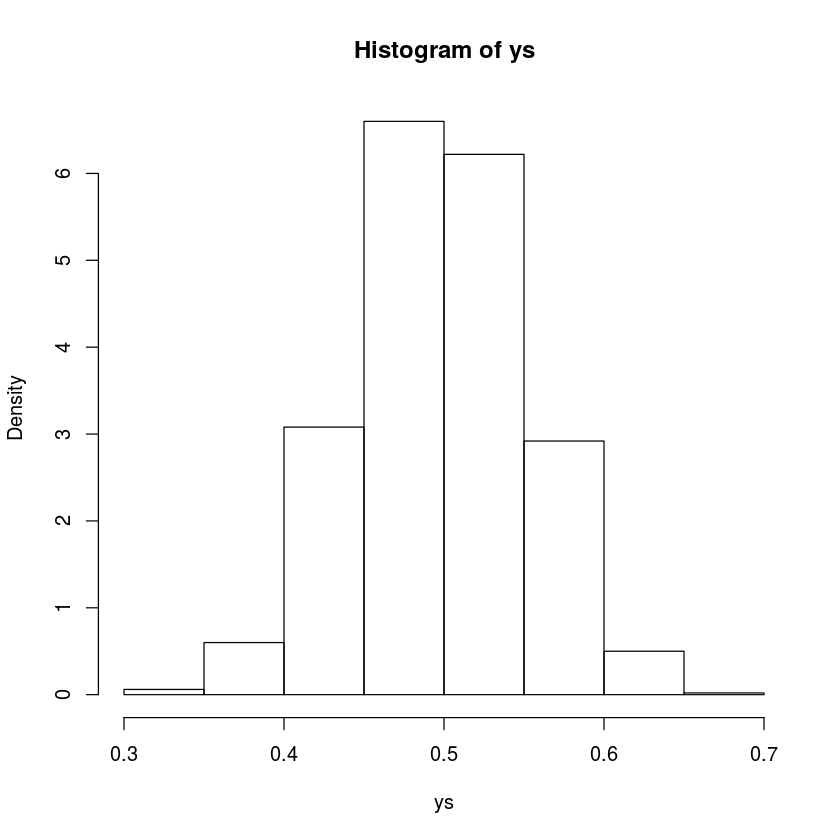

In [66]:
# Ej 2.d
ys = sapply(1:1000, function(x) { return(mean(runif(30, 0, 1))) } )
hist(ys, freq=F)

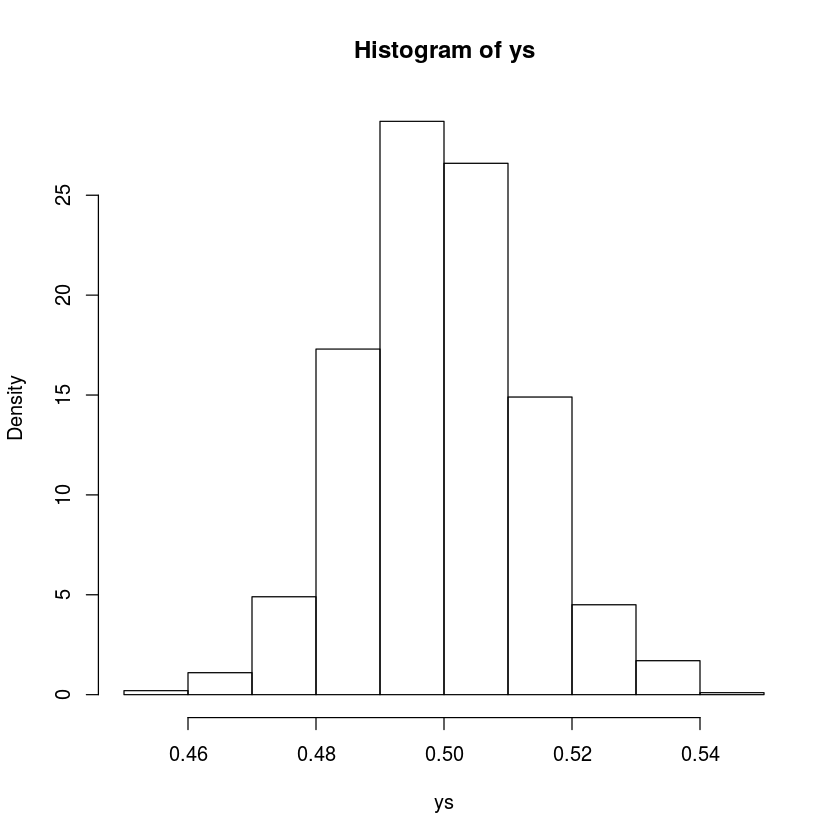

In [67]:
# Ej 2.e
ys = sapply(1:1000, function(x) { return(mean(runif(500, 0, 1))) } )
hist(ys, freq=F)